# Table of Contents
 <p><div class="lev1"><a href="#Task-1.-Compiling-Ebola-Data"><span class="toc-item-num">Task 1.&nbsp;&nbsp;</span>Compiling Ebola Data</a></div>
 <div class="lev1"><a href="#Task-2.-RNA-Sequences"><span class="toc-item-num">Task 2.&nbsp;&nbsp;</span>RNA Sequences</a></div>
 <div class="lev1"><a href="#Task-3.-Class-War-in-Titanic"><span class="toc-item-num">Task 3.&nbsp;&nbsp;</span>Class War in Titanic</a></div></p>

In [94]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

DATA_FOLDER = 'Data' # Use the data folder provided in Tutorial 02 - Intro to Pandas.

## Task 1. Compiling Ebola Data

The `DATA_FOLDER/ebola` folder contains summarized reports of Ebola cases from three countries (Guinea, Liberia and Sierra Leone) during the recent outbreak of the disease in West Africa. For each country, there are daily reports that contain various information about the outbreak in several cities in each country.

Use pandas to import these data files into a single `Dataframe`.
Using this `DataFrame`, calculate for *each country*, the *daily average per month* of *new cases* and *deaths*.
Make sure you handle all the different expressions for *new cases* and *deaths* that are used in the reports.

In [ ]:
# Write your answer here

## Task 2. RNA Sequences

In the `DATA_FOLDER/microbiome` subdirectory, there are 9 spreadsheets of microbiome data that was acquired from high-throughput RNA sequencing procedures, along with a 10<sup>th</sup> file that describes the content of each. 

Use pandas to import the first 9 spreadsheets into a single `DataFrame`.
Then, add the metadata information from the 10<sup>th</sup> spreadsheet as columns in the combined `DataFrame`.
Make sure that the final `DataFrame` has a unique index and all the `NaN` values have been replaced by the tag `unknown`.

In [ ]:
# Write your answer here

## Task 3. Class War in Titanic

Use pandas to import the data file `Data/titanic.xls`. It contains data on all the passengers that travelled on the Titanic.

In [5]:
from IPython.core.display import HTML
HTML(filename=DATA_FOLDER+'/titanic.html')

Name,Labels,Units,Levels,Storage,NAs
pclass,,,3,integer,0
survived,Survived,,,double,0
name,Name,,,character,0
sex,,,2,integer,0
age,Age,Year,,double,263
sibsp,Number of Siblings/Spouses Aboard,,,double,0
parch,Number of Parents/Children Aboard,,,double,0
ticket,Ticket Number,,,character,0
fare,Passenger Fare,British Pound (\243),,double,1
cabin,,,187,integer,0


For each of the following questions state clearly your assumptions and discuss your findings:
1. Describe the *type* and the *value range* of each attribute. Indicate and transform the attributes that can be `Categorical`. 
2. Plot histograms for the *travel class*, *embarkation port*, *sex* and *age* attributes. For the latter one, use *discrete decade intervals*. 
3. Calculate the proportion of passengers by *cabin floor*. Present your results in a *pie chart*.
4. For each *travel class*, calculate the proportion of the passengers that survived. Present your results in *pie charts*.
5. Calculate the proportion of the passengers that survived by *travel class* and *sex*. Present your results in *a single histogram*.
6. Create 2 equally populated *age categories* and calculate survival proportions by *age category*, *travel class* and *sex*. Present your results in a `DataFrame` with unique index.

### Question 1

  * `pclass`: The travel class of the passenger. Can be either 1st, 2nd or 3rd class. This attribute is `Categorical`.
  * `survived`: If the passenger survived. Can be `1` if he survived, `0` otherwise. We converted it to `bool`.
  * `name`: The fullname of the passenger.
  * `sex`: The sex of the passenger. Can be either male or female. This attribute is `Categorical`.
  * `age`: The age of the passenger. The value is a `double` to accomodate the age of newborns (`< 1` year old).
  * `sibsp`: The number of siblings/spouses aboard. The value is a `double` but we converted it to `int64`.
  * `parch`: The number of parents/children aboard. The value is a `double` but we converted it to `int64`.
  * `ticket`: The ticket number of the passenger. We kept it as `character` since the ticket number is sometimes prefixed by characters.
  * `fare`: The price of the ticket in British Pound (`double`).
  * `cabin`: The cabin's number of the passenger. Muliple passengers can share the same cabin's number and passengers can have multiple cabins. The letter refers to the deck (A to G). We ignored invalid values.
  * `embarked`: The place the passenger embarked. Can be either `C`, `Q` or `S` (for 'Chertbourg', 'Queenstown' and 'Southampton'). This attribute is `Categorical`.
  * `boat`: The identifier of the boat that saved the passenger. When multiple boats are listed, we filtered the field to only keep the last one (this seems to be the correct one referenced in Encyclopedia Titanica). Once filtered, this field become `Categorical`.
  * `body`: The number that identify the body found. NaN if no body was found.
  * `home.dest`: A string containing the home and the destination of the passenger.

In [240]:
# Load titanic's data
titanic = pd.read_excel(DATA_FOLDER + '/titanic.xls')

# Reformat and cleanup the data
titanic.pclass = titanic.pclass.astype('category')
titanic.survived = titanic.survived.astype('bool')
titanic.sex = titanic.sex.astype('category')
titanic.sibsp = titanic.sibsp.astype('int64')
titanic.parch = titanic.parch.astype('int64')
titanic.embarked = titanic.embarked.astype('category')
titanic.boat = titanic.boat.map(lambda boat: np.nan if pd.isnull(boat) else str(boat).split(' ')[-1]).astype('category')

titanic

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,True,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,True,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,False,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,False,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,False,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,True,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,True,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,False,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,True,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,False,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


### Question 2

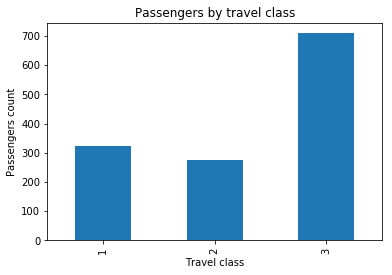

In [235]:
pclass_hist = titanic.pclass.value_counts().sort_index().plot(kind = 'bar')
pclass_hist.set_title('Passengers by travel class')
pclass_hist.set_xlabel('Travel class')
pclass_hist.set_ylabel('Passengers count')

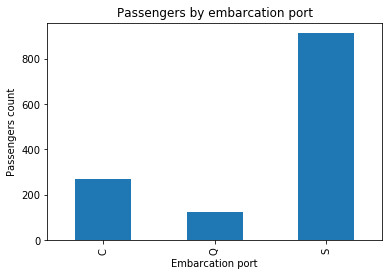

In [233]:
embarked_hist = titanic.embarked.value_counts().sort_index().plot(kind = 'bar')
embarked_hist.set_title('Passengers by embarcation port')
embarked_hist.set_xlabel('Embarcation port')
embarked_hist.set_ylabel('Passengers count')

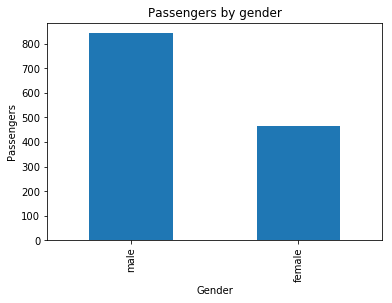

In [202]:
sex_hist = titanic.sex.value_counts().plot(kind = 'bar')
sex_hist.set_title('Passengers by gender')
sex_hist.set_xlabel('Gender')
sex_hist.set_ylabel('Passengers count')

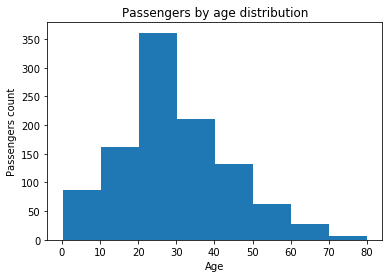

In [213]:
age_hist = titanic.age.hist(bins = int(titanic.age.max() / 10), grid = False)
age_hist.set_title('Passengers by age distribution')
age_hist.set_xlabel('Age')
age_hist.set_ylabel('Passengers count')

### Question 3

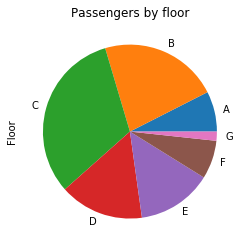

In [305]:
def extract_floor(cabin):
    if pd.isnull(cabin):
        return np.nan
    
    floor = cabin[0]
    if floor < 'A' or floor > 'G':
        return np.nan
    else:
        return floor

titanic['floor'] = titanic.cabin.map(extract_floor)
floor_pie = titanic.floor.value_counts().sort_index().plot(kind = 'pie')
floor_pie.set_title('Passengers by floor')
floor_pie.set_ylabel('Floor')
floor_pie.set_aspect('equal')

### Question 4

AttributeError: 'Series' object has no attribute 'sort'

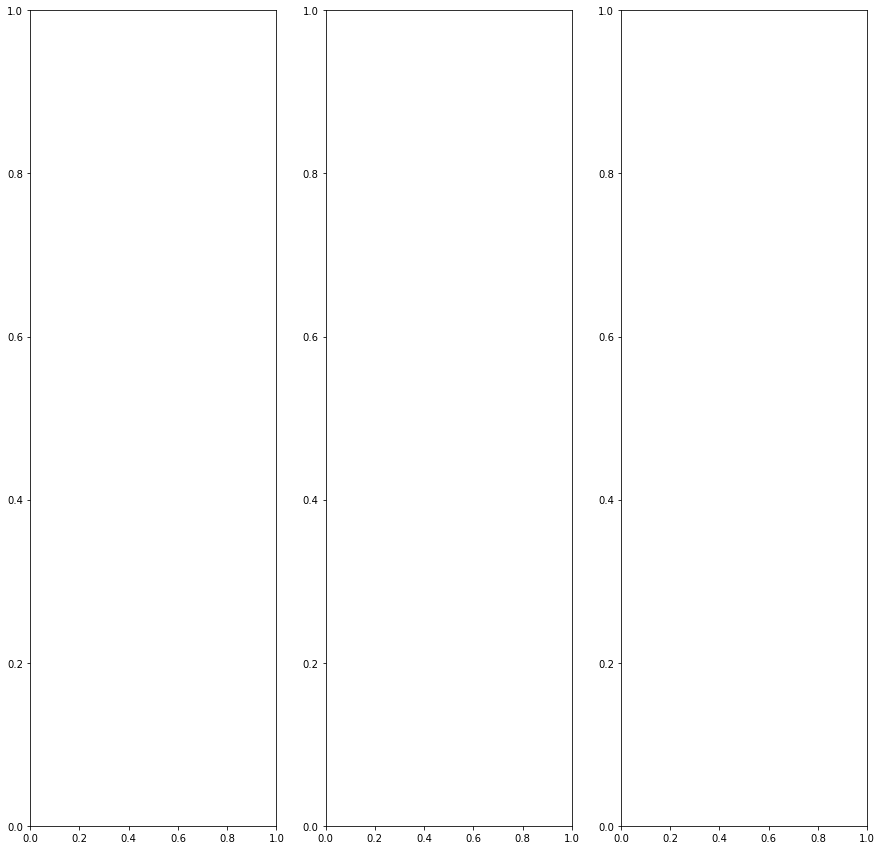

In [331]:
survive_by_pclass = titanic.groupby(['pclass', 'survived']).size()

fig, axes = plt.subplots(ncols = 3)
fig.set_figheight(15)
fig.set_figwidth(15)

for pclass in titanic.pclass.cat.categories:
    pclass_pie = survive_by_pclass[pclass].s('survived').plot(kind = 'pie', ax = axes[pclass - 1])
    pclass_pie.set_title('Survivors for ' + str(pclass) + ' class')
    pclass_pie.set_ylabel('Survived')
    pclass_pie.set_aspect('equal')